<h1>Predicting House Prices<br>
    <span style='font-weight: medium; font-size:1.5rem; line-height:1.05'>Training and fine-tuning a regression&nbsp;model</span>
<h1>

## Introduction
    
In this project, we will train a machine-learning model to predict median house prices in small districts of the United States (US). These districts are inhabited by about 600–3000 people each.

The dataset that we will use to train the model lists the average house prices in ~20,000 small districts of California, a US state. Each row of the dataset contains details about one district. These details include the average house price in a district and the population of the district.

Our goals for this project are as follows:

- Explore the data.
    
- Preprocess the data.
    
- Choose a model.

- Train the model.

- Fine-tune the model so that it can predict the price of a house to a high degree of accuracy, using data that it has not been trained&nbsp;on.

## Exploratory data analysis

In [1]:
# Importing the housing data as a dataframe

seed = 0

import pandas as pd

df = pd.read_csv('../input/housing/housing.csv')

In [2]:
df.shape

(20640, 10)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
# Displaying the counts, percentages, and data types of null values

import util_eda as ueda

ueda.get_nulls_dtypes(df)

,count_null,percent_null,data_type
total_bedrooms,207,1.002907,float64


The total_bedrooms column has null values.

In [5]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In the dataset excerpt above, the total_rooms column specifies the total number of rooms in all the houses of a district and median_income indicates the median income in each district.

Note that the median_income column doesn't contain USD values. The values in this column have been capped and range from approximately 0.49 to 15. To obtain the USD version of any of these values, multiply the value by 10,000. So, if a median_income is 0.5, its USD equivalent will be USD 5,000.

The values in the housing_median_age and median_house_value columns have also been delimited. These delimitations of numerical values can confuse our model. It might come to the conclusion that all houses below or above specific thresholds have the same price. We will find a way to prevent this confusion later in the project.

Out of the 10 columns of the dataset, nine, including median_income and median_house_value, contain numerical data. The 10<sup>th</sup> column, ocean_proximity, is different. It contains categorical data.

Let us find out the number of unique categories in the ocean_proximity column.

In [6]:
df.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

The category names are in uppercase and have spaces in them. Let us edit these names.

In [7]:
df.ocean_proximity = df.ocean_proximity.str.lower().\
                     str.replace(' ', '_')

How many districts belong to each category?

In [8]:
# Calculating the number of districts in each category
df.ocean_proximity.value_counts()

<1h_ocean     9136
inland        6551
near_ocean    2658
near_bay      2290
island           5
Name: ocean_proximity, dtype: int64

In [9]:
# Viewing summarized details about the numerical attributes of the dataframe
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


The median age of houses is 29, and the median house price is USD 179,700. There is some skewness in the&nbsp;data.

To better understand the distribution of each numerical attribute, let us plot its data using a histogram.

In [10]:
ueda.set_sns_styles()

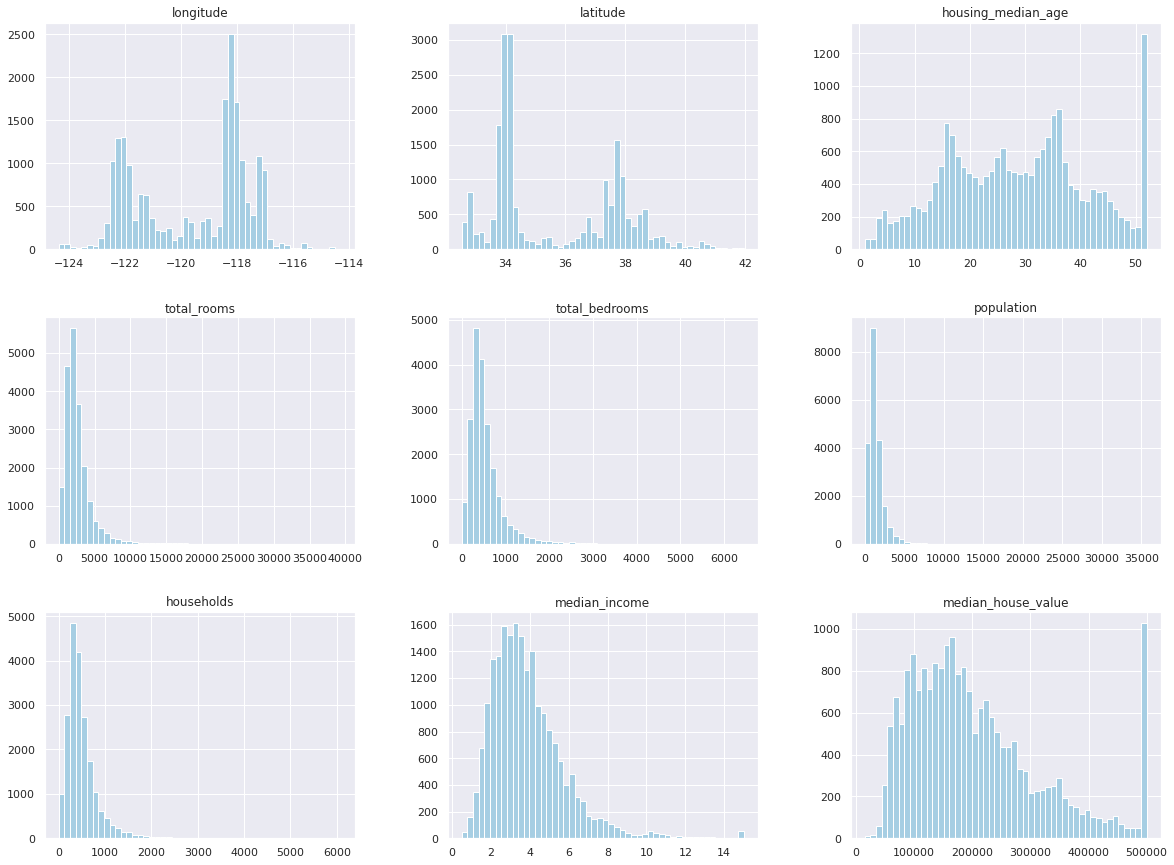

In [11]:
df.hist(bins=50, figsize=(20,15));

In [12]:
df.median_income.min(), df.median_income.max()

(0.4999, 15.0001)

In [13]:
df.median_house_value.min(), df.median_house_value.max()

(14999.0, 500001.0)

The data in most of the variables is not distributed uniformly, and so their histograms are tail heavy. There are more categories of values to the right of the medians of these variables than to their left.

Capping has also introduced bias in the data. The highest values in the housing_median_age and median_house_value columns have much higher counts than lower values.

The bias can lead to an imbalanced distribution of values when we split the dataframe into training and testing sets. To reduce imbalance, we can use a strategy called stratified sampling. For example, we can group the values in the median_income column into categories, and then sample specific numbers of rows from each group to create our testing dataset. This will ensure that the rows in the testing dataset are balanced as far as median incomes are concerned.

To apply stratified sampling, we will begin by grouping the median incomes.

In [14]:
import numpy as np

housing = df.copy()
bin_vals = np.arange(0, 7, 1.5)
bin_vals = np.append(bin_vals, np.inf)

housing['income_cat'] = pd.cut(housing.median_income,\
                               bins=bin_vals,\
                               labels=list(range(1, 6)))

In [15]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,near_bay,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,near_bay,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,near_bay,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,near_bay,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,near_bay,3


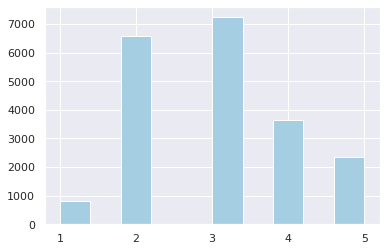

In [16]:
# Depicting the distribution of the newly created income categories

housing.income_cat.astype(str).sort_values().hist();

Now, we will split the dataset using stratified samples.

In [17]:
from sklearn.model_selection import StratifiedShuffleSplit

st_sp = StratifiedShuffleSplit(n_splits=1, test_size=0.2,\
                               random_state=seed)

for train_idx, test_idx in st_sp.split(housing,\
                                       housing.income_cat):
    strat_train = housing.loc[train_idx]
    strat_test = housing.loc[test_idx]

In [18]:
strat_train.shape, strat_test.shape

((16512, 11), (4128, 11))

Let us compare the proportions of income categories in the overall and testing datasets.

In [19]:
prop_overall = housing.income_cat.value_counts() / len(housing)
prop_strat_test = strat_test.income_cat.value_counts() / len(strat_test)

df_prop = pd.DataFrame({'income_proportions_overall': prop_overall,\
                        'income_proportions_strat_test': prop_strat_test})

df_prop

,income_proportions_overall,income_proportions_strat_test
3,0.350581,0.350533
2,0.318847,0.318798
4,0.176308,0.176357
5,0.114438,0.114583
1,0.039826,0.039729


The proportions are similar. We will now delete the income_cat columns from the split datasets.

In [20]:
datasets = [strat_train, strat_test]

for dataset in datasets:
    dataset.drop('income_cat', axis=1, inplace=True)

Now, we will try to understand the data better by visualizing the contents of the training dataset. We won't delve into the testing dataset because any patterns that we detect in it might bias our choice of algorithms for the proposed model. This can lead to overfitting. The model might perform well on the testing dataset but not on unknown datasets. It might not be able to generalize its learning.

In [21]:
# Creating a copy of the training dataset for visualization

viz = strat_train.copy()

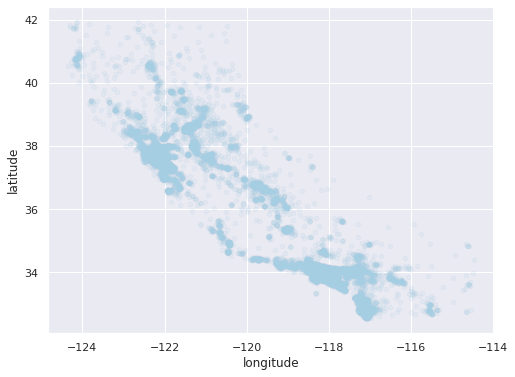

In [22]:
# Visualizing geographical data using a scatter plot

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 6))

viz.plot(kind='scatter', x='longitude', y='latitude',\
         alpha=0.125, ax=ax);

As our dataset contains details about Californian districts, the dots are clustered into the shape of California. The darker areas of the plot correspond to geographical regions that have a larger number of districts than other regions.

Next, let us look at the median house value in each district, marked by a latitude and longitude pair. We will scale each scatter-plot point based on the population of the corresponding district.

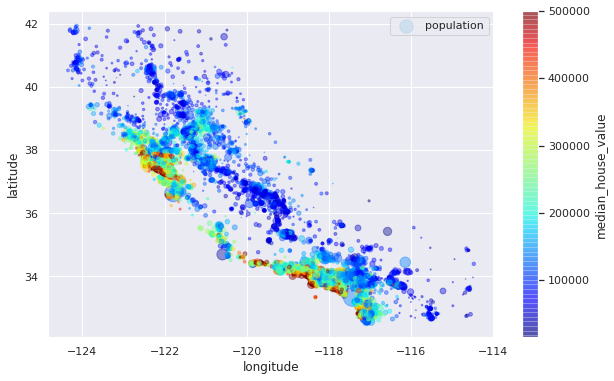

In [23]:
fig, ax = plt.subplots(figsize=(10, 6))

viz.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,\
         s=viz.population/100, label='population',\
         c='median_house_value', cmap=plt.get_cmap('jet'),\
         colorbar=True, ax=ax)

plt.legend();

The plot indicates that houses in the coastal regions of California—along the western edges—are more expensive.

How are various pairs of features in the dataset correlated?

In [24]:
# Calculating correlation coffecient between pairs of features

corr_matrix = viz.corr()

In [25]:
# Presenting the correlations between median house values and the other features

corr_matrix.median_house_value.sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688883
total_rooms           0.137469
housing_median_age    0.107144
households            0.069177
total_bedrooms        0.053544
population           -0.023797
longitude            -0.043236
latitude             -0.145570
Name: median_house_value, dtype: float64

Let us depict some of the signficant positive correlations using a graph.

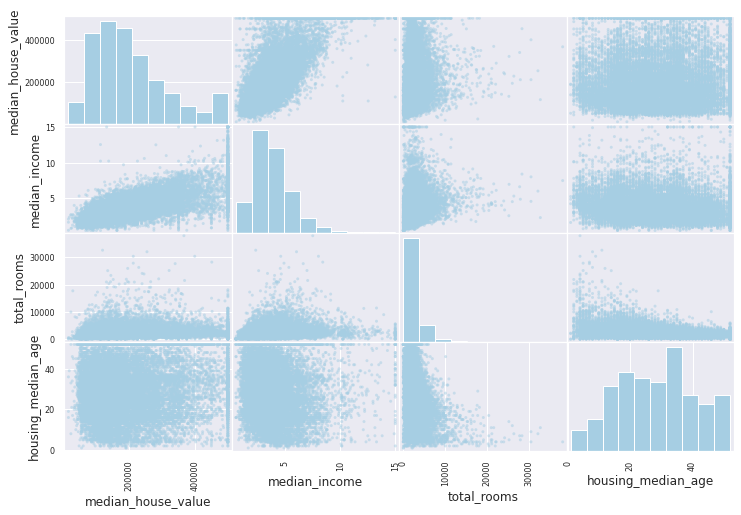

In [26]:
# Presenting correlations between median house value and three independent features

from pandas.plotting import scatter_matrix

selected_features = ['median_house_value', 'median_income',\
                     'total_rooms', 'housing_median_age',]

scatter_matrix(viz[selected_features], figsize=(12, 8));

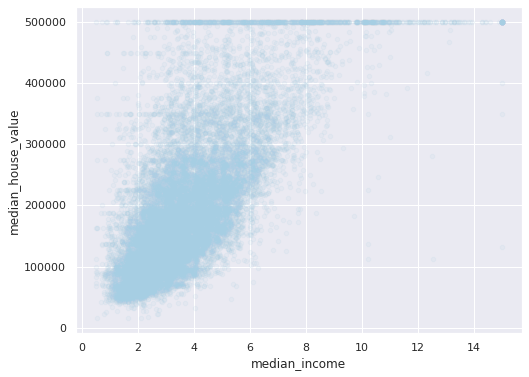

In [27]:
# Presenting the correlation between median house value and
# the feature that has the strongest positive correlation with it, median income

fig, ax = plt.subplots(figsize=(8, 6))

viz.plot(kind='scatter', x='median_income',\
         y='median_house_value', alpha=0.1, ax=ax);

In addition to illustrating the positive correlation between the features, the plot also highlights the price cap of USD 500,000. There is a horizontal line of points at the top of the plot, at the 500000 mark on the y axis.

There are also noticeable linear arrangements of points at the 450000, 350000, and 280000 marks. Later in the project, to prevent biased learning in the proposed model, we might consider removing rows that contain these values.

For now, we will engineer a few new features in the dataset.

## Feature engineering

 The features that we will add are the following:

- The number of rooms per household

- The number of bedrooms per room

- The population per household

In [28]:
viz['rooms_per_household'] = viz.total_rooms / viz.households
viz['bedrooms_per_room'] = viz.total_bedrooms / viz.total_rooms
viz['population_per_household'] = viz.population / viz.households

Note that we could also use a custom class to add these values.

In [29]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_idx, bedrooms_idx, population_idx, households_idx = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    '''
    This class can add additional columns to a dataset
    - BaseEstimator will give the class access to methods that
      allow hyperparameter tuning, get_params() and set_params()
    - TransformerMixin will give the class access to the
      fit_transform() method    
    '''    
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_idx] / X[:, households_idx]
        population_per_household = X[:, population_idx] /\
                                   X[:, households_idx]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_idx] / X[:, rooms_idx]
            return np.c_[X, rooms_per_household, population_per_household,\
                     bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

Let us calculate the correlation coffecient of the dataset features again.

In [30]:
# Calculating correlation coffecient between pairs of features

corr_matrix = viz.corr()

# Presenting the correlations between median house values and the other features

corr_matrix.median_house_value.sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688883
rooms_per_household         0.157620
total_rooms                 0.137469
housing_median_age          0.107144
households                  0.069177
total_bedrooms              0.053544
population                 -0.023797
population_per_household   -0.026888
longitude                  -0.043236
latitude                   -0.145570
bedrooms_per_room          -0.255870
Name: median_house_value, dtype: float64

The new bedrooms_per_room feature is more strongly correlated with median_house_value than total_rooms and total_bedrooms. The rooms_per_household and population_per_household features also have stronger correlations with median_house_value than total_rooms and population, respectively.

Now that we understand the data fairly well and know the impact of new features, we can begin preparing the data for model training.

## Preprocessing the data

Here are the tasks for this step:

1. Imputation

2. One-hot encoding

3. Feature scaling

### Imputation

We will begin by separating the target variable from the independent variables.

In [31]:
X = strat_train.drop('median_house_value', axis=1)
y = strat_train.median_house_value.copy()

Next, we will fill out the missing values in the total_bedrooms column using a Scikit-learn imputer. This imputer works in two steps. In the first step, it fits the data in each target column. In the second step, it transforms or fills out the column based on the pattern that it learned during the first step.

In this project, we will fit the imputer to all the numerical columns of the X dataset. This will future proof the performance of the imputer. When we begin working with new data, we won't be constrained if any columns other than the total_bedrooms column have missing values. The imputer will not require any additional tuning to fill out these columns.

In [32]:
# Segregating the numerical and categorical 

numerical_cols = list(X.select_dtypes(include=['float64']).columns)
categorical_cols = list(X.select_dtypes(include=['object', 'category']).columns)

In [33]:
# Fitting a SimpleImputer instance on numerical data and then using
# the instance to fill out the missing numerical values with the median of the
# corresponding column

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

X[numerical_cols] = imputer.fit_transform(X[numerical_cols])

### One-hot encoding

In this task, we will replace the categorical column in the dataset with multiple new columns, or dummy variables.

Each dummy variable will have the following characteristics:

- Represents one of the categories that are listed in the categorical column

- Contains binary values, either 1 or 0, with 1 indicating that a dataset row has the corresponding category and 0 indicating that it doesn't

We will begin by writing a function that can create dummies.

In [34]:
def create_dummies(df, column_name):
    '''
    This function will convert a dataset column into dummy variables and
    append the dummies to the dataset.
    '''
    df = pd.get_dummies(df, columns = [column_name], prefix=column_name)
    return df

Next, we will apply the function to add dummies to the dataset.

In [35]:
for col in categorical_cols:
    X = create_dummies(X, col)

### Feature scaling

During this task, we will apply a uniform scale to the numerical data in the dataset. Scaling will make this data more conducive to machine learning. We will use the StandardScaler module of Scikit-learn to scale the data.

But before we write any data-scaling code, let us acknowledge that we will have to scale any validation and testing datasets as well. We will also have to apply all the previous transformations to them. This means that we will have to use the data-preparation code that we have written so far repetitively. A better alternative to this is to use a Scikit-learn pipeline to apply all the transformations to a dataset in one step.

Here is how we will create the pipeline:

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

'''
The following pipeline will transform both the
numerical and categorical columns of a housing dataset.
'''

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, numerical_cols),
    ("cat", OneHotEncoder(), categorical_cols)
])

Before we apply the pipeline, let us create a fresh set of datasets containing the independent and dependent variables.

In [37]:
housing = strat_train.drop('median_house_value', axis=1)
housing_labels = strat_train.median_house_value.copy()

Now, we will apply the pipeline to the housing dataset.

In [38]:
housing_prepared = full_pipeline.fit_transform(housing)

## Selecting and training a model

We will first find out how a linear-regression (LR) model performs on the data.

In [39]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(housing_prepared, housing_labels)

LinearRegression()

Let us try this model on a sample of our dataset.

In [40]:
samp_data = housing.iloc[:5]
samp_labels = housing_labels.iloc[:5]

samp_data_prepared = full_pipeline.transform(samp_data)

In [41]:
print('Predictions: ', lr.predict(samp_data_prepared))

Predictions:  [172713.58885788  43130.16935351 195014.22158132 268919.62476372
  44875.4698183 ]


In [42]:
print('Labels: ', list(samp_labels))

Labels:  [142800.0, 57900.0, 181300.0, 245300.0, 73900.0]


What is the model's root mean square error (RMSE) on the entire training dataset?

In [43]:
from sklearn.metrics import mean_squared_error

housing_predictions = lr.predict(housing_prepared)

lr_mse = mean_squared_error(housing_labels, housing_predictions)
lr_rmse = np.sqrt(lr_mse)

lr_rmse

68284.24083518104

The error is too high, and this means that the model is underfitting.

Will another model prove more effective? Let us find out how accurate a decision-tree model will be on the&nbsp;data.

In [44]:
# Training a decision-tree model

from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(housing_prepared, housing_labels);

In [45]:
# Evaluating the trained decision-tree model

housing_predictions = dt.predict(housing_prepared)

dt_mse = mean_squared_error(housing_labels, housing_predictions)
dt_rmse = np.sqrt(dt_mse)

dt_rmse

0.0

The decision-tree model didn't make any errors, but this result could be misleading. It is possible that the model is overfitting the training data and will not perform well on the testing or real-world&nbsp;data.

Let us evaluate the model further using k-fold cross validation. A k-fold strategy works as follows:

1. Divide preprocessed data into multiple subsets or folds—for example, 10&nbsp;folds. 

2. Train and evaluate a model 10 times on the data. During each iteration, use one fold for evaluation and nine folds for training. Keep shuffling the folds so that a different fold is used for evaluation each&nbsp;time.

3. Save the evaluation score of each iteration in an array. The greater a score, the more accurate the model has&nbsp;been.

In [46]:
# Training a decision-tree model using k-fold
# cross validation and calculating its scores

from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt, housing_prepared, housing_labels,\
                         scoring="neg_mean_squared_error", cv=10)

dt_rmse_scores = np.sqrt(-scores)

In [47]:
# Specifying a function to print the scores

def display_scores(scores):
    print('Scores: ', scores)
    print('Mean: ', scores.mean())
    print('Standard deviation: ', scores.std())

In [48]:
# Applying the function

display_scores(dt_rmse_scores)

Scores:  [70299.29524818 73411.41291334 70696.3081514  69764.66119716
 68482.82846074 70102.37744958 72772.10704367 71744.75410212
 66781.12065357 70243.62494024]
Mean:  70429.84901599852
Standard deviation:  1840.6905133031746


The scores prove that the deicision tree was less accurate than a simply trained LR&nbsp;model.

How will the LR model perform if we train it using the k-fold strategy?

In [49]:
lrk_scores = cross_val_score(lr, housing_prepared, housing_labels,\
                             scoring="neg_mean_squared_error", cv=10)

lrk_rmse_scores = np.sqrt(-lrk_scores)
display_scores(lrk_rmse_scores)

Scores:  [68816.92050905 69919.6105217  66113.14067776 67981.42224765
 68715.57149727 69992.34941025 67163.97848562 70841.91062928
 66611.37068257 68651.01821515]
Mean:  68480.72928763037
Standard deviation:  1456.394289447671


The decision-tree model also performed worse than the LR model that we trained using the k-fold strategy.

Next, let us try a random-forest (RF) regressor.

In [50]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

rfk_scores = cross_val_score(rf, housing_prepared, housing_labels,\
                             scoring="neg_mean_squared_error", cv=10)

rfk_rmse_scores = np.sqrt(-rfk_scores)
display_scores(rfk_rmse_scores)

Scores:  [49647.442677   53618.08699347 48110.87099838 50015.23883042
 51082.41157272 48191.56837961 49317.12317954 51185.8241962
 50353.49916508 51809.73329881]
Mean:  50333.179929123624
Standard deviation:  1593.3749684374707


The RF regressor performed better than the other models, but it is still overfitting the&nbsp;data. 

Let us fine-tune the model to improve its performance.

In [51]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10],\
     'max_features': [2, 3, 4]}
]

grid_rf = GridSearchCV(rf, param_grid, cv=5,\
                       scoring='neg_mean_squared_error',\
                       return_train_score=True)

grid_rf.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [52]:
print(grid_rf.best_score_)
print(grid_rf.best_params_)
print(grid_rf.best_estimator_)

-2510901349.670499
{'max_features': 6, 'n_estimators': 30}
RandomForestRegressor(max_features=6, n_estimators=30)


In [53]:
rf_grid = grid_rf.best_estimator_
rf_grid.score(housing_prepared, housing_labels)

0.9719718380902409

In [54]:
feature_importances = rf_grid.feature_importances_
feature_importances

array([8.42568656e-02, 7.35900153e-02, 4.23497594e-02, 1.88488350e-02,
       1.70974470e-02, 1.67904673e-02, 1.65452245e-02, 3.04811215e-01,
       5.65430386e-02, 1.03769664e-01, 9.54410472e-02, 7.92114153e-03,
       1.54503420e-01, 2.61454416e-04, 2.11207819e-03, 5.15832691e-03])

## Evaluating the trained&nbsp;model

In [55]:
X_test = strat_test.drop('median_house_value', axis=1)
y_test = strat_test.median_house_value.copy()

X_test_prepared = full_pipeline.transform(X_test)

final_pred = rf_grid.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_pred)
final_rmse = np.sqrt(final_mse)
rf_grid.score(X_test_prepared, y_test)

0.8262041673609859

In [56]:
final_rmse

48002.21180444762

In [57]:
# Determining the 95% confidence interval of the generalization error

from scipy import stats

confidence = 0.95
squared_errors = (final_pred - y_test) ** 2

np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,\
                         loc=squared_errors.mean(),\
                         scale=stats.sem(squared_errors)))

array([45869.34670647, 50044.25750233])

We can further fine-tune the model to improve its prediction accuracy.

## Reference

Aurélien Géron. Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow. Sebastopol: O’Reilly Media, Inc., 2019.